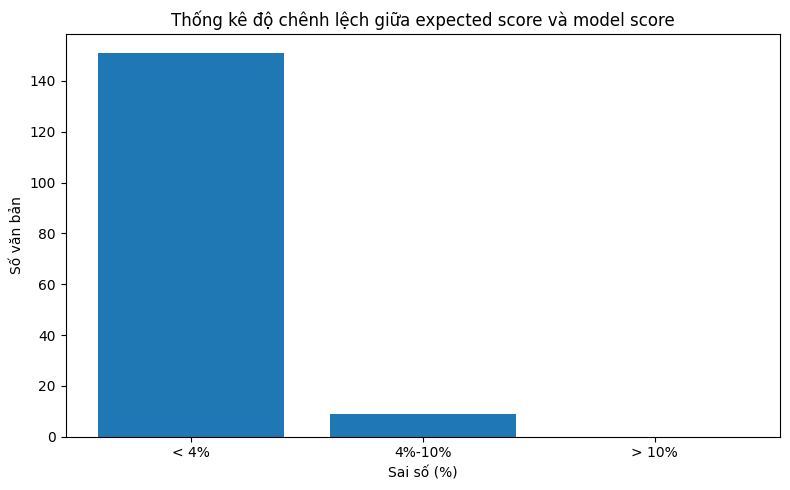

In [ ]:
import json
import os
import matplotlib.pyplot as plt
def get_percentage_of_matched_characters(filepath):
    file_name = filepath.replace(".pdf","").replace(".json","")
    percent_str = file_name.split("_")[-1]
    percent = float(percent_str.replace("%", ""))
    return percent

def get_results_from_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)
    plagiarism_result = data.get("overall_similarity", 0)
    return plagiarism_result

folder_result = r"D:\Code\Python\Project_Python\DNU_PlagiarismChecker\winnowing\result_testcase"
def plot_results():
    different_percentages = {"< 4%" : 0, "4%-10%": 0, "> 10%": 0}
    for filename in os.listdir(folder_result):
        if filename.endswith(".json"):
            filepath = os.path.join(folder_result, filename)
            expected_percent = get_percentage_of_matched_characters(filename)
            detected_percent = get_results_from_file(filepath)
            difference = abs(expected_percent - detected_percent)
            if difference < 4:
                different_percentages["< 4%"] += 1
            elif 4 <= difference <= 10:
                different_percentages["4%-10%"] += 1
            else:
                different_percentages["> 10%"] += 1
    categories = list(different_percentages.keys())
    values = list(different_percentages.values())
    # write value on every bar
    plt.figure(figsize=(8, 5))
    plt.bar(categories, values)
    plt.xlabel("Sai số (%)")
    plt.ylabel("Số văn bản")
    plt.title("Thống kê độ chênh lệch giữa expected score và model score")
    plt.tight_layout()
    plt.show()
plot_results()